<hr/>
* **Escriba aqui su nombre (MAYÚSCULAS)**: 

# (Solución)
# TERCER EXAMEN PARCIAL (PARTE-PRÁCTICA)
#### Realice los dos ejercicios a continuación:
<hr/>
### **Primer Punto (Factorizacion LU)**
#### Considere el siguiente sistema de ecuaciones de la forma $A \vec{x} = \vec{b}$:

\begin{equation}
    \begin{bmatrix}
         2 & 1 & & & & &  \\
         1 & 2 & 1 & & & & \\
         & 1 & 2 & 1 & & & \\
         & & \ddots & \ddots & \ddots & & \\
         & & & 1 & 2 & 1 & \\
         & & & & 1 & 2 & 1  \\
          & & & & & 1 & 2
    \end{bmatrix} \begin{bmatrix}
        x_0 \\
        x_1 \\
        \vdots \\
        \vdots \\
        x_{n-1} \\
        x_n 
    \end{bmatrix} = \begin{bmatrix}
        a_0 \\
        a_1 \\
        \vdots \\
        \vdots \\
        a_{n-1}\\
        a_n
    \end{bmatrix}
\end{equation}

#### para las incógnitas $x_0,x_1, \dots, x_n$, donde $a_i = i$ y los elementos que no se muestran de la matriz de coeficientes son cero. Recuerde que aquí $A$ es la matriz de coeficientes, $\vec{x}$ es el vector de incógnitas y $\vec{b}$ es el vector de constantes.
<hr/>

* Escriba una funcion con la estructura que se muestra a continuacion y que permita construir la matriz de coeficientes $A$ del sistema de ecuaciones mostrado previamente** (considere que la funcion debe ser lo mas general posible de manera que pueda construir una matriz de cualquier tamaño $n$ arbitrario, ademas note que debe utilizar la libreria Numpy)**:

In [99]:
import numpy as np
def matriz(n):
    # aqui creamos una matriz vacia
    A = np.zeros((n,n),'float64') 
    # luego llenamos los espacios
    A[0,0] = 2
    A[0,1] = 1
    for i in range(1,n-1):
        A[i,i] = 2
        A[i,i-1] = 1
        A[i,i+1] = 1
    A[n-1,n-1] = 2
    A[n-1,n-2] = 1
    return A

* Tome $n = 5$ y construya una matriz $A$ de ese tamaño, luego debe crear un vector de constantes $\vec{b}$ como se muestra en el enunciado de este ejercicio **(es decir, considerando los valores $a_i  = i$)**:

In [44]:
A = matriz(5)
B = np.zeros(5)
for i in range(5):
    B[i] = i
print(A)
print(B)

[[2. 1. 0. 0. 0.]
 [1. 2. 1. 0. 0.]
 [0. 1. 2. 1. 0.]
 [0. 0. 1. 2. 1.]
 [0. 0. 0. 1. 2.]]
[0. 1. 2. 3. 4.]


* Copie en la siguiente celda, el código necesario para factorizar de forma general una matriz $A$ en la forma $LU$ **(considere una funcion  que haga este proceso)**:

In [45]:
def lu_fac(matriz):
    A = np.array(matriz)
    epsilon = np.finfo(np.float).eps
    dims = A.shape
    L = np.zeros(dims)
    U = np.zeros(dims)
    for j in range(dims[0]):
        if abs(A[j,j]) < epsilon:
            print('ERROR: pivote nulo')
            return None
        L[j,j] = 1.0
        for i in range(j+1,dims[0]):
            L[i,j] = A[i,j]/A[j,j]
            for k in range(j+1,dims[0]):
                A[i,k] = A[i,k] - L[i,j]*A[j,k]
        for k in range(j,dims[0]):
            U[j,k] = A[j,k]
    
    return L, U

* Realice la factorizacion $LU$ de la matriz $A$ creada en el paso anterior y verifique que la multiplicacion de matrices satisface la relacion $LU = A$.

In [46]:
L, U = lu_fac(A)
np.dot(L,U)

array([[2., 1., 0., 0., 0.],
       [1., 2., 1., 0., 0.],
       [0., 1., 2., 1., 0.],
       [0., 0., 1., 2., 1.],
       [0., 0., 0., 1., 2.]])

* Importe la funcion que sea necesaria para resolver el sistema de ecuaciones usando la sustitucion hacia adelante y hacia atras **(revise los apuntes de clase para encontrar la funcion adecuada y obtener el vector de incógnitas $\vec{x}$ al final)**:

In [47]:
def lu_sol(A,B):
    L, U = lu_fac(A)
    size = A.shape[1]
    X = np.zeros(size)
    Y = np.zeros(size)
    Y[0] = B[0]/L[0,0]
    # sustitucion hacia adelante
    for i in range(1,size):
        sum = 0
        for j in range(i):
            sum += L[i,j]*Y[j]
        Y[i] = (B[i]-sum) / L[i,i]
    X[size-1] = Y[size-1]/U[size-1,size-1]
    # sustitucion hacia atras
    for i in range(size-1,0,-1):
        sum = 0
        for j in range(size-1,i,-1):
            sum += U[i,j]*X[j]
        X[i] = (Y[i] - sum) / U[i,i]
    return X

* Luego aplique la funcion anterior para resolver el sistema con las matrices de tamaño $n=5$ creadas previamente **(verifique mediante multiplicacion de matrices que la solucion es correcta y que por lo tanto cumple que $A \vec{x} = \vec{b}$)**:

In [48]:
x = lu_sol(A,B)
print(B)
np.dot(A,x)

[0. 1. 2. 3. 4.]


array([0., 1., 2., 3., 4.])

<hr/>
### **Segundo Punto (Ecuaciones diferenciales ordinarias)**
#### Considere el siguiente PVI:
\begin{equation}
    \left\{
    \begin{array}{ll}
        y' = 2xy -x   \\
        y(0) = 0.4
    \end{array}
    \right.
\end{equation}

** Primero, importamos las librerias a usar:

In [100]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

* Copie en la siguiente celda, el código necesario para resolver un PVI de primer orden cualquier por el método de Euler y el método de Runge-Kutta de cuarto orden **(revise los apuntes de clase para implementar funciones separadas para los dos algoritmos)**:

In [21]:
def euler(f,x0,y0,xf,nd):
    x    = np.zeros(nd)
    y    = np.zeros(nd)
    dx   = float(xf-x0)/nd
    x[0] = x0
    y[0] = y0
    for i in range(nd-1):
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dx*f(x[i],y[i])
    return x, y

def rk4(f,x0,y0,xf,nd):
    x    = np.zeros(nd)
    y    = np.zeros(nd)
    dx   = float(xf-x0)/nd
    x[0] = x0
    y[0] = y0
    for i in range(nd-1):
        x[i+1] = x[i] + dx
        s1 = f(x[i],y[i])
        s2 = f(x[i]+0.5*dx,y[i]+0.5*dx*s1)
        s3 = f(x[i]+0.5*dx,y[i]+0.5*dx*s2)
        s4 = f(x[i]+dx,y[i]+dx*s3)
        y[i+1] = y[i] + (dx/6.0)*(s1+2*s2+2*s3+s4)
    return x, y

#### Sabiendo que la solucion exacta al problema de valor inicial planteado esta dada por:

\begin{equation}
    y(t) = -\frac{1}{10}e^{x^2} + \frac{1}{2}
\end{equation}

* Primero construya una funcion que le permita identificar el $f(x,y)$ de la ecuacion diferencial.
* Segundo, construya una funcion "ex_sol(x)" que le permita calcular la solucion exacta.

#### realice los dos pasos dentro de la misma celda, a continuacion:

In [98]:
import math as m
def f(x,y):
    return 2*x*y - x

def ex_sol(x):
    return (-1.0/10)*m.exp(pow(x,2))-0.5

* Obtenga las soluciones por Euler y RK4 al PVI planteado usando $20$ iteraciones y calculando la solucion hasta un $x_f = 3.0$. Luego grafique ambas soluciones numéricas junto con la solucion exacta y compare **(A partir de la gráfica usted deberá identificar cual método es mas eficiente en este caso)**. 

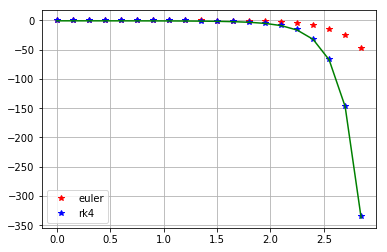

In [94]:
xe, ye = euler(f,0,0.4,3.0,20) 
xr, yr = rk4(f,0,0.4,3.0,20) 
vsol = np.vectorize(ex_sol)
yex = vsol(xe)
plt.plot(xe,ye,'r*',label = 'euler')
plt.plot(xr,yr,'b*',label = 'rk4')
plt.plot(xe,yex,'g')
plt.grid(True)
plt.legend()